# Exercícios da Aula 3 - Edmur C. Neto - 12558492

1 - Para os dados gerados pelo código abaixo, ajuste um modelo de regressão polinomial considerando um polinômio de grau 3 e 5. Qual oferece o melhor ajuste em termos do coeficiente R²?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


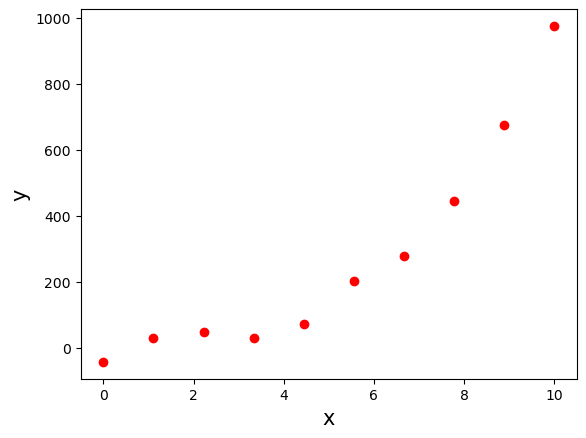

In [11]:
N = 10
x = []
x = np.linspace(0,10,N)
y = x**3 + np.random.normal(0,50, N)
plt.plot(x,y, 'ro')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)

plt.show(True)

Para construir um modelo de regressão, sabemos que os dados y deverão seguir algo como $y_i = b_0 + b_1 x_i³ + \epsilon$ ou $y_i = b_0 + b_1 x_i⁵ + \epsilon$, desse modo, criamos colunas para treinar um modelo que minimize os erros.

In [13]:
# Transforma os dados para o treinamento

transforme_3 = PolynomialFeatures(degree=3, include_bias=False)
transforme_5 = PolynomialFeatures(degree=5, include_bias=False)

x = x.reshape((-1,1))
transforme_3.fit(x)
transforme_5.fit(x)

x_3 = transforme_3.transform(x)
x_5 = transforme_5.transform(x)



Dessa forma, temos os dados de x, x², ..., x⁵, prontos para encontrar os coeficientes correspondentes.

In [14]:
# Construindo o modelo

model_3 = LinearRegression().fit(x_3, y)
model_5 = LinearRegression().fit(x_5, y)

y_3 = model_3.predict(x_3)
y_5 = model_5.predict(x_5)

Após a construção do modelo e realizações de predições, plotamos o gráfico da correspondência entre os pontos do modelo e os pontos reais de y:

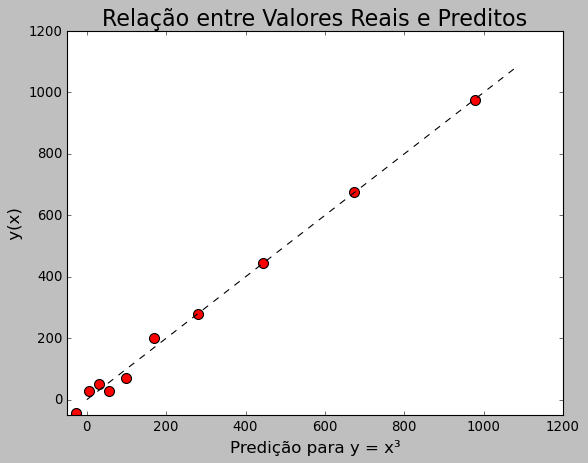

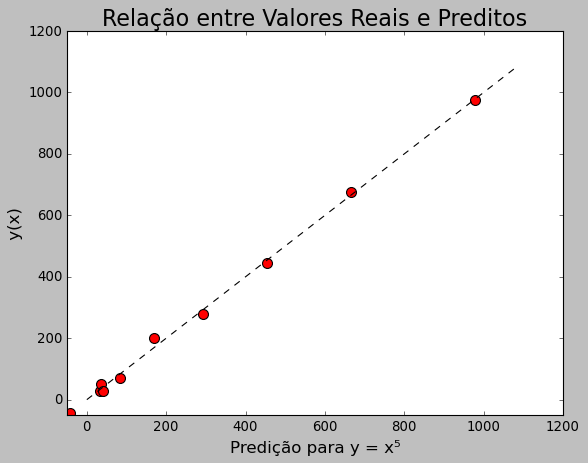

In [15]:
xl = np.arange(0,1200, 120)
yl = xl

plt.style.use("classic")
plt.title("Relação entre Valores Reais e Preditos", fontsize=20)
plt.xlabel("Predição para y = x³", fontsize=15)
plt.ylabel(" y(x) ", fontsize = 15)
plt.scatter(y_3, y, c="r", s=80)
plt.plot(xl, yl, linestyle="--",c="black")
plt.xlim(-50,1200)
plt.ylim(-50,1200)
plt.show()

plt.style.use("classic")
plt.title("Relação entre Valores Reais e Preditos", fontsize=20)
plt.xlabel("Predição para y = x⁵", fontsize=15)
plt.ylabel(" y(x) ", fontsize = 15)
plt.scatter(y_5, y, c="r", s=80)
plt.plot(xl, yl, linestyle="--",c="black")
plt.xlim(-50,1200)
plt.ylim(-50,1200)
plt.show()

Podemos avaliar os dados para os modelos obtidos:

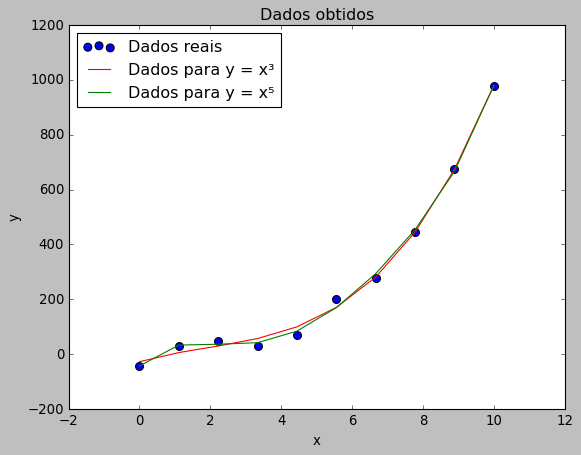

In [16]:
plt.scatter(x,y, s=50, label="Dados reais")
plt.plot(x, y_3, linestyle="-", c="red", label="Dados para y = x³")
plt.plot(x, y_5, linestyle="-", c="green", label="Dados para y = x⁵")
plt.legend(loc="upper left")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dados obtidos")
plt.show()

In [17]:
from sklearn.metrics import r2_score
R2_3 = r2_score(y, y_3)
R2_5 = r2_score(y, y_5)

print('R2 para x³:', R2_3)
print('R2 para x⁵:', R2_5)

R2 para x³: 0.9962843882074031
R2 para x⁵: 0.9980727339378697
